Comparing different IBGE tract files

In [1]:
import geopandas as gpd
import fiona

fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'

* `tracts_old` is supposed to refer to São Paulo city
* `tracts_new` is supposed to refer to São Paulo state

In [2]:
tracts_new = gpd.read_file('../data/sao-paulo/ibge/sectors/33SEE250GC_SIR.shp')
tracts_old = gpd.read_file('../data/sao-paulo/ibge/sectors.kml')

In [3]:
len(tracts_new), len(tracts_old)

(68296, 18953)

In [4]:
tracts_new.head()

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0  98237.0  354100005000009  URBANO  35410000500       None  354100005   
1  98232.0  354100005000004  URBANO  35410000500       None  354100005   
2  98230.0  354100005000002  URBANO  35410000500       None  354100005   
3  98229.0  354100005000001  URBANO  35410000500       None  354100005   
4  98231.0  354100005000003  URBANO  35410000500       None  354100005   

     NM_DISTRIT CD_GEOCODM    NM_MUNICIP NM_MICRO                     NM_MESO  \
0  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
1  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
2  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
3  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
4  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   

     CD_GEOCODB  NM_BAIRRO  ID1  \
0  354100005001  Boqueirão    1   
1  354100005001  Boqueirão    2   
2  354100005001  Boqueirão    3   
3  354100005001  Boqueirão    4   
4  354100005001  Boqueirão    5   

                                            geometry  
0  POLYGON ((-46.410239 -24.011028, -46.411694999...  
1  POLYGON ((-46.416055 -24.002446, -46.415983999...  
2  POLYGON ((-46.412132 -24.007921, -46.412442 -2...  
3  POLYGON ((-46.411342 -24.00552, -46.411965 -24...  
4  POLYGON ((-46.413264 -24.005136, -46.414838 -2...

In [5]:
tracts_old.head()

Name                                        Description  \
0  355030804000079  <center><table><tr><th colspan='2' align='cent...   
1  355030804000080  <center><table><tr><th colspan='2' align='cent...   
2  355030804000081  <center><table><tr><th colspan='2' align='cent...   
3  355030804000082  <center><table><tr><th colspan='2' align='cent...   
4  355030804000083  <center><table><tr><th colspan='2' align='cent...   

                                            geometry  
0  POLYGON Z ((-46.517785 -23.5794739998022 0, -4...  
1  POLYGON Z ((-46.51888100000001 -23.57966699980...  
2  POLYGON Z ((-46.520151 -23.5810459998022 0, -4...  
3  POLYGON Z ((-46.52139999999999 -23.57991699980...  
4  POLYGON Z ((-46.523712 -23.5818479998022 0, -4...

Are there common tracts between them?

In [6]:
join = tracts_old.merge(tracts_new, left_on='Name', right_on='CD_GEOCODI')
len(join), len(tracts_old)

(18953, 18953)

Wow! All old tracts match with the new ones.
* Are them from São Paulo city?

In [7]:
join.NM_MUNICIP.value_counts()

SÃO PAULO    18953
Name: NM_MUNICIP, dtype: int64

Picking one area to inspect

In [8]:
join.geometry_x[0].bounds

(-46.51980399999999, -23.5825619998022, -46.517785, -23.5791639998022)

In [9]:
join.geometry_y[0].bounds

(-46.519804, -23.582562, -46.517784999999996, -23.579164)

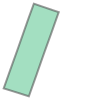

In [10]:
join.geometry_x[0]

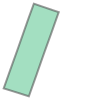

In [11]:
join.geometry_y[0]

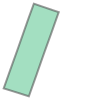

In [12]:
join.geometry_x[0].intersection(join.geometry_y[0])

They seem to be the same, but with coordinates rounded at different decimal places
* Let's intersect both geometries for each tract

In [13]:
def intersection_perc(row):
    intersection = row.geometry_x.intersection(row.geometry_y)
    return intersection.area / row.geometry_y.area
    
join['intersection'] = join.apply(intersection_perc, axis=1)

In [14]:
join['intersection'].min(), join['intersection'].max()

(0.9999980791249563, 0.9999999905075185)

**CONCLUSION:** the old file is like a filtered and processed version of the new.